## Task 2.1

In [16]:
from sklearn.datasets import fetch_covtype
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
covertype = fetch_covtype()

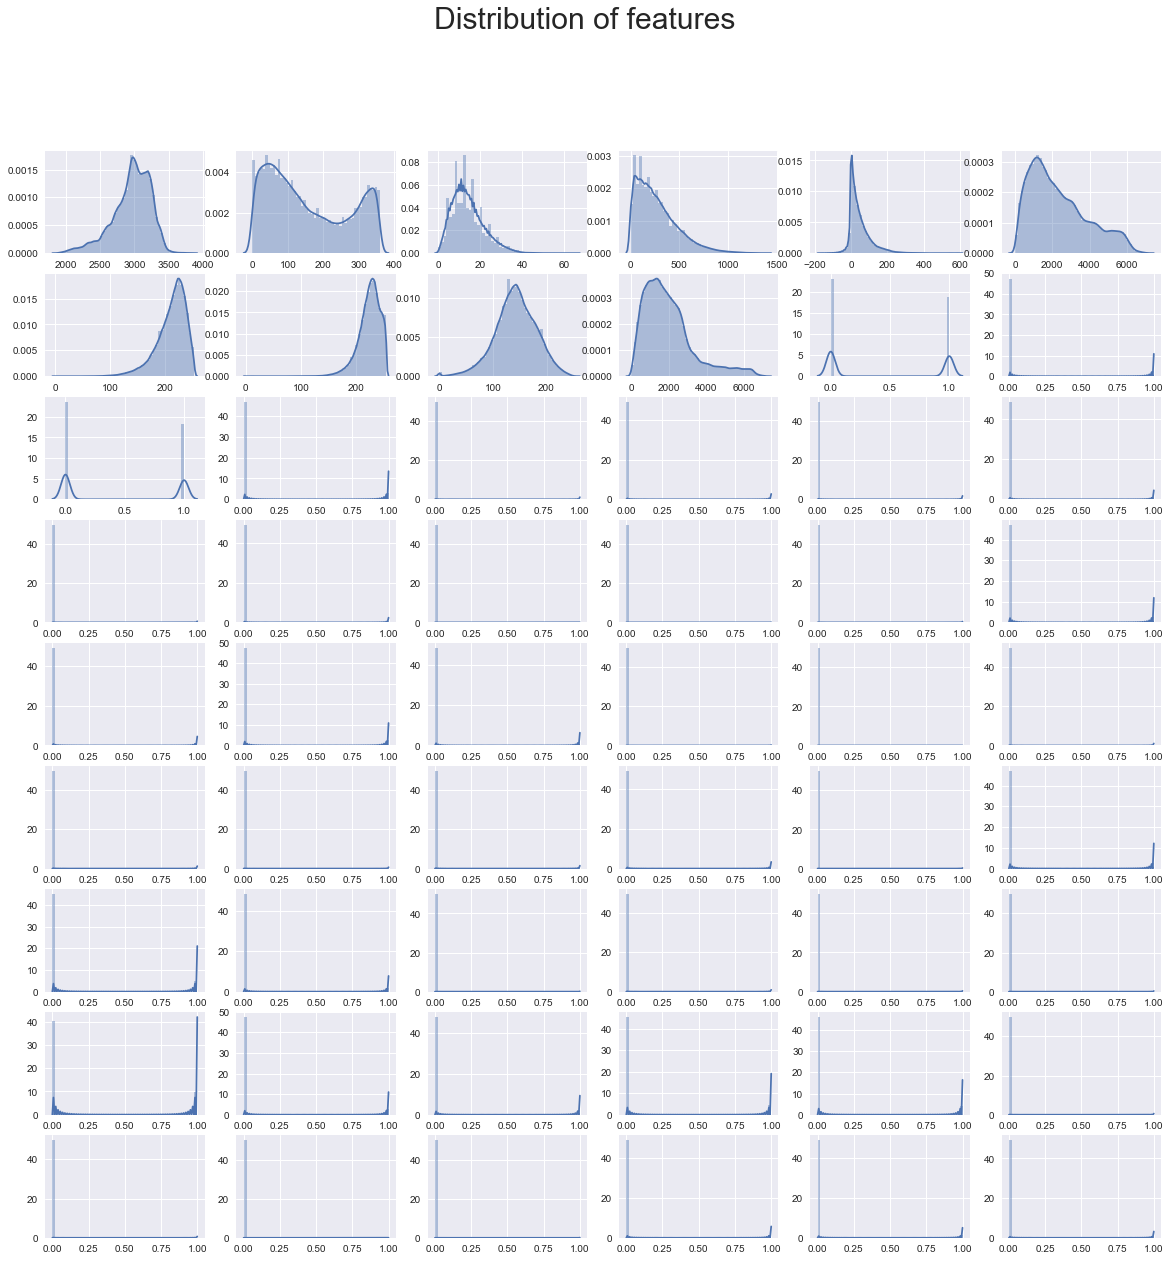

In [14]:
fig, axes = plt.subplots(9,6,figsize=(20,20))
k=0
for i in range(9):
    for j in range(6):
        sns.distplot(covertype.data[:,k], ax = axes[i,j])
        k+=1
plt.suptitle("Distribution of features", fontsize=30)

According to the data description and our draft plot, we can see the last 44 columns in the data are binary variables, to have a clearer view. We redraw the graph without those columns.

In [21]:
features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_To_Hydrology', 
            'Vertical_To_Hydrology', 'Horizontal_To_Roadways', 'Hillshade_9am',
           'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_To_Fire_Points']

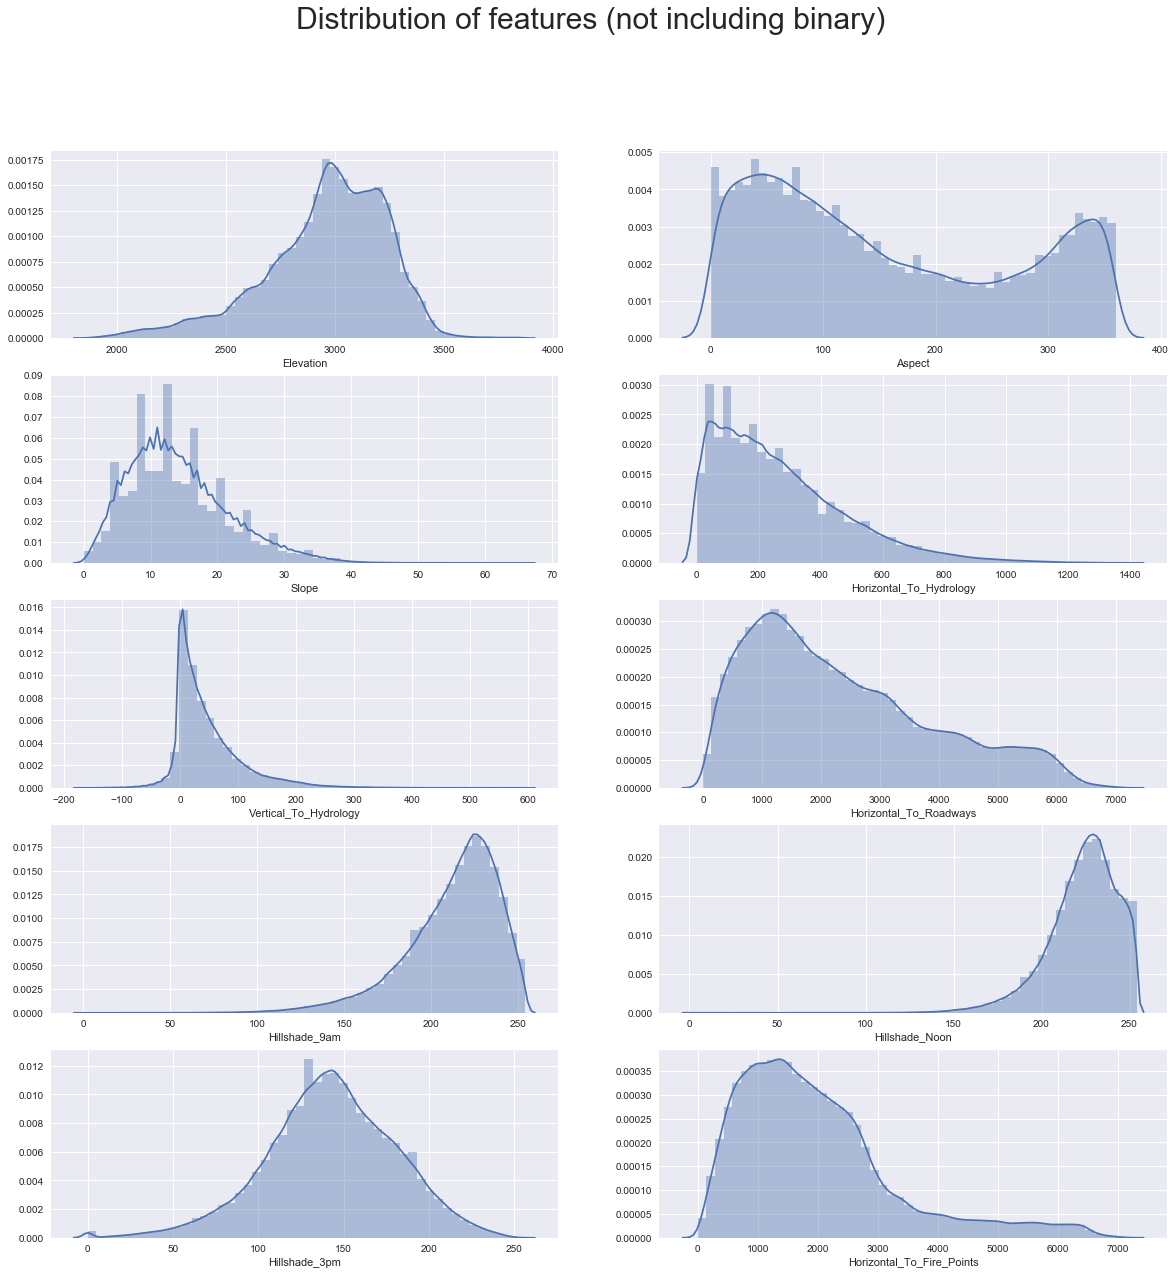

In [24]:
fig, axes = plt.subplots(5,2,figsize=(20,20))
k=0
for i in range(5):
    for j in range(2):
        sns.distplot(covertype.data[:,k],axlabel=features[k], ax = axes[i,j])
        k+=1
plt.suptitle("Distribution of features (not including binary)", fontsize=30)

Then, it might also be helpful to take a look at the boxplot.

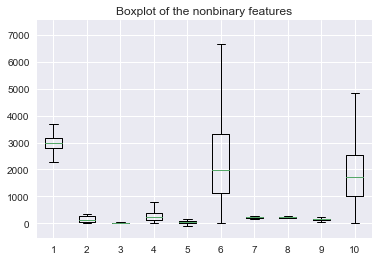

In [37]:
data_nonbinary = covertype.data[:,np.arange(10)]
box = plt.boxplot(data_nonbinary)
plt.title("Boxplot of the nonbinary features")

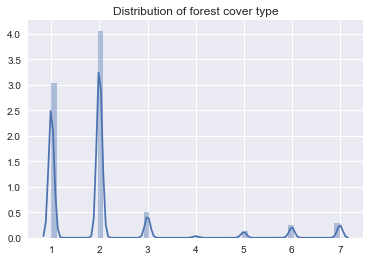

In [36]:
sns.distplot(covertype.target)
plt.title("Distribution of forest cover type")

## Task 2.2:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(covertype.data, covertype.target)

In [41]:
logR = LogisticRegression(tol=0.1, dual=False, solver='sag')
svc = LinearSVC(tol=0.1, dual=False)
NC = NearestCentroid()

In [42]:
score_logR = cross_val_score(logR, X_train, y_train)
score_svc = cross_val_score(svc, X_train, y_train)
score_NC = cross_val_score(NC, X_train, y_train)

In [43]:
print("Mean cross-validation score for LogisticRegression:{:.5f}".format(np.mean(score_logR)))
print("Mean cross-validation score for SVC:{:.5f}".format(np.mean(score_svc)))
print("Mean cross-validation score for NearestCentroid:{:.5f}".format(np.mean(score_NC)))

Mean cross-validation score for LogisticRegression:0.63475
Mean cross-validation score for SVC:0.52773
Mean cross-validation score for NearestCentroid:0.19360


Then we scale the data with StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [45]:
score_scaled_logR = cross_val_score(logR, X_train_scaled, y_train)
score_scaled_svc = cross_val_score(svc, X_train_scaled, y_train)
score_scaled_NC = cross_val_score(NC, X_train_scaled, y_train)

In [46]:
print("Mean scaled cross-validation score for LogisticRegression:{:.5f}".format(np.mean(score_scaled_logR)))
print("Mean scaled cross-validation score for SVC:{:.5f}".format(np.mean(score_scaled_svc)))
print("Mean scaled cross-validation score for NearestCentroid:{:.5f}".format(np.mean(score_scaled_NC)))

Mean scaled cross-validation score for LogisticRegression:0.70017
Mean scaled cross-validation score for SVC:0.71290
Mean scaled cross-validation score for NearestCentroid:0.55064


## Answer 2.2: 

Yes, by using the Standard, the results all improved.

## Task 2.3 

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid_logR = {'C': np.logspace(0, 3, 20)}
grid_logR = GridSearchCV(logR, param_grid_logR)
grid_logR.fit(X_train, y_train)

param_grid_svc = {'C': np.logspace(-3, -1, 20)}
grid_svc = GridSearchCV(svc, param_grid_svc)
grid_svc.fit(X_train, y_train)

param_grid_NC = {'shrink_threshold': np.linspace(0, 300, 20)}
grid_NC = GridSearchCV(NC, param_grid_NC)
grid_NC.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=NearestCentroid(metric='euclidean', shrink_threshold=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'shrink_threshold': array([  0.     ,  15.78947,  31.57895,  47.36842,  63.15789,  78.94737,
        94.73684, 110.52632, 126.31579, 142.10526, 157.89474, 173.68421,
       189.47368, 205.26316, 221.05263, 236.84211, 252.63158, 268.42105,
       284.21053, 300.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
print("best mean cross-validation score:for logistic regression {:.5f}".format(grid_logR.best_score_))
print("best parameters for logistic: {}".format(grid_logR.best_params_))
print("best mean cross-validation score:for svc {:.5f}".format(grid_svc.best_score_))
print("best parameters for svc: {}".format(grid_svc.best_params_))
print("best mean cross-validation score:for Nearest Centroid {:.5f}".format(grid_NC.best_score_))
print("best parameters for Nearest Centroid: {}".format(grid_NC.best_params_))

best mean cross-validation score:for logistic regression 0.63773
best parameters for logistic: {'C': 54.55594781168517}
best mean cross-validation score:for svc 0.52773
best parameters for svc: {'C': 0.003359818286283781}
best mean cross-validation score:for Nearest Centroid 0.44493
best parameters for Nearest Centroid: {'shrink_threshold': 221.05263157894737}


## LogisticRegression GridSearchCV Plot

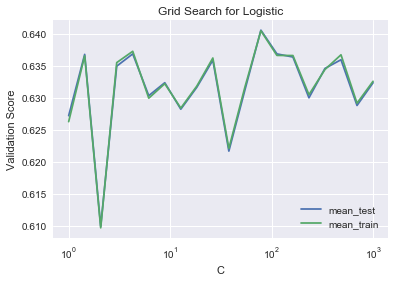

In [91]:
plt.plot(np.logspace(0,3,20),grid_logR.cv_results_['mean_test_score'], label="mean_test")
plt.plot(np.logspace(0,3,20),grid_logR.cv_results_['mean_train_score'], label="mean_train")
plt.xlabel("C")
plt.xscale("log")
plt.ylabel("Validation Score")
plt.title("Grid Search for Logistic")
plt.legend()

* Notice the train and test here are not for the main data, but for the data used by the cross validation. 

## SVC GridSearchCV Plot

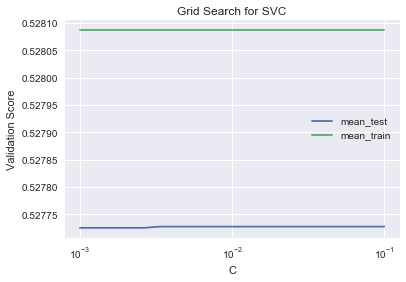

In [95]:
plt.plot(np.logspace(-3,-1,20),grid_svc.cv_results_['mean_test_score'],label="mean_test")
plt.plot(np.logspace(-3,-1,20),grid_svc.cv_results_['mean_train_score'],label="mean_train")
plt.xlabel("C")
plt.xscale("log")
plt.ylabel("Validation Score")
plt.title("Grid Search for SVC")
plt.legend()

## Nearest Centroid GridSearchCVPlot

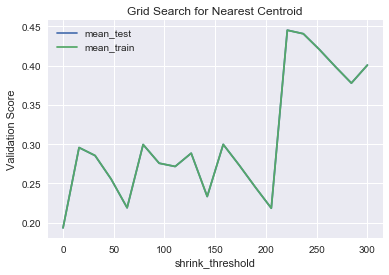

In [96]:
plt.plot(np.linspace(0,300,20),grid_NC.cv_results_['mean_test_score'],label="mean_test")
plt.plot(np.linspace(0,300,20),grid_NC.cv_results_['mean_train_score'],label="mean_train")
plt.xlabel("shrink_threshold")
plt.ylabel("Validation Score")
plt.title("Grid Search for Nearest Centroid")
plt.legend()

* In this plot, these is little difference between mean train and mean test for cross validation.

## Answer 2.3:

The results for logistic regression and svc don't improve. The result for nearest centroid improves.

## Task 2.4

In [64]:
from sklearn.model_selection import KFold
kf1 = KFold(n_splits=3, shuffle=True, random_state= 30)
kf2 = KFold(n_splits=6, shuffle=True, random_state= 30)
kf3 = KFold(n_splits=3, shuffle=True, random_state= 40)

## For the first time, we use 3 splits, and random state 30

In [65]:
param_grid_logR = {'C': np.logspace(0, 3, 10)}
grid_logR = GridSearchCV(logR, param_grid_logR, cv=kf1)
grid_logR.fit(X_train, y_train)

param_grid_svc = {'C': np.logspace(-3, -1, 10)}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=kf1)
grid_svc.fit(X_train, y_train)

param_grid_NC = {'shrink_threshold': np.linspace(0, 300, 10)}
grid_NC = GridSearchCV(NC, param_grid_NC, cv=kf1)
grid_NC.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=30, shuffle=True),
       error_score='raise',
       estimator=NearestCentroid(metric='euclidean', shrink_threshold=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'shrink_threshold': array([  0.     ,  33.33333,  66.66667, 100.     , 133.33333, 166.66667,
       200.     , 233.33333, 266.66667, 300.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
print("best mean cross-validation score:for logistic regression {:.5f}".format(grid_logR.best_score_))
print("best parameters for logistic: {}".format(grid_logR.best_params_))
print("best mean cross-validation score:for svc {:.5f}".format(grid_svc.best_score_))
print("best parameters for svc: {}".format(grid_svc.best_params_))
print("best mean cross-validation score:for Nearest Centroid {:.5f}".format(grid_NC.best_score_))
print("best parameters for Nearest Centroid: {}".format(grid_NC.best_params_))

best mean cross-validation score:for logistic regression 0.63541
best parameters for logistic: {'C': 21.544346900318832}
best mean cross-validation score:for svc 0.53319
best parameters for svc: {'C': 0.001}
best mean cross-validation score:for Nearest Centroid 0.44414
best parameters for Nearest Centroid: {'shrink_threshold': 233.33333333333334}


## For the second time, we use 6 splits, and keep the random state 30 as unchanged.

In [67]:
param_grid_logR = {'C': np.logspace(0, 3, 10)}
grid_logR2 = GridSearchCV(logR, param_grid_logR, cv=kf2)
grid_logR2.fit(X_train, y_train)

param_grid_svc = {'C': np.logspace(-3, -1, 10)}
grid_svc2 = GridSearchCV(svc, param_grid_svc, cv=kf2)
grid_svc2.fit(X_train, y_train)

param_grid_NC = {'shrink_threshold': np.linspace(0, 300, 10)}
grid_NC2 = GridSearchCV(NC, param_grid_NC, cv=kf2)
grid_NC2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=30, shuffle=True),
       error_score='raise',
       estimator=NearestCentroid(metric='euclidean', shrink_threshold=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'shrink_threshold': array([  0.     ,  33.33333,  66.66667, 100.     , 133.33333, 166.66667,
       200.     , 233.33333, 266.66667, 300.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
print("best mean cross-validation score:for logistic regression {:.5f}".format(grid_logR2.best_score_))
print("best parameters for logistic: {}".format(grid_logR2.best_params_))
print("best mean cross-validation score:for svc {:.5f}".format(grid_svc2.best_score_))
print("best parameters for svc: {}".format(grid_svc2.best_params_))
print("best mean cross-validation score:for Nearest Centroid {:.5f}".format(grid_NC2.best_score_))
print("best parameters for Nearest Centroid: {}".format(grid_NC.best_params_))

best mean cross-validation score:for logistic regression 0.63841
best parameters for logistic: {'C': 2.154434690031884}
best mean cross-validation score:for svc 0.52556
best parameters for svc: {'C': 0.001}
best mean cross-validation score:for Nearest Centroid 0.46222
best parameters for Nearest Centroid: {'shrink_threshold': 233.33333333333334}


## For the third time, we use 3 splits as unchanged, and use the random state 40.

In [69]:
param_grid_logR = {'C': np.logspace(0, 3, 10)}
grid_logR3 = GridSearchCV(logR, param_grid_logR, cv=kf3)
grid_logR3.fit(X_train, y_train)

param_grid_svc = {'C': np.logspace(-3, -1, 10)}
grid_svc3 = GridSearchCV(svc, param_grid_svc, cv=kf3)
grid_svc3.fit(X_train, y_train)

param_grid_NC = {'shrink_threshold': np.linspace(0, 300, 10)}
grid_NC3 = GridSearchCV(NC, param_grid_NC, cv=kf3)
grid_NC3.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=40, shuffle=True),
       error_score='raise',
       estimator=NearestCentroid(metric='euclidean', shrink_threshold=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'shrink_threshold': array([  0.     ,  33.33333,  66.66667, 100.     , 133.33333, 166.66667,
       200.     , 233.33333, 266.66667, 300.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [70]:
print("best mean cross-validation score:for logistic regression {:.5f}".format(grid_logR3.best_score_))
print("best parameters for logistic: {}".format(grid_logR3.best_params_))
print("best mean cross-validation score:for svc {:.5f}".format(grid_svc3.best_score_))
print("best parameters for svc: {}".format(grid_svc3.best_params_))
print("best mean cross-validation score:for Nearest Centroid {:.5f}".format(grid_NC3.best_score_))
print("best parameters for Nearest Centroid: {}".format(grid_NC3.best_params_))

best mean cross-validation score:for logistic regression 0.63792
best parameters for logistic: {'C': 1.0}
best mean cross-validation score:for svc 0.53221
best parameters for svc: {'C': 0.001}
best mean cross-validation score:for Nearest Centroid 0.44398
best parameters for Nearest Centroid: {'shrink_threshold': 233.33333333333334}


## Answer 2.4:

By change cross validation strategy. The results didn't improve. For the parameters found,logistic and svc's parameter 'C' become smaller, while the parameter for Nearest Centroid doesn't change much. Neither by changeing the seed of shuddling nor by changing the n_splits would change the results.

## Task 2.5: 

In [98]:
logR_best = LogisticRegression(tol=0.1, dual=False, solver='sag', C=54.55594)
svc_best = LinearSVC(tol=0.1, dual=False, C=0.0033598)
logR_best.fit(X_train, y_train)
svc_best.fit(X_train, y_train)

LinearSVC(C=0.0033598, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.1,
     verbose=0)

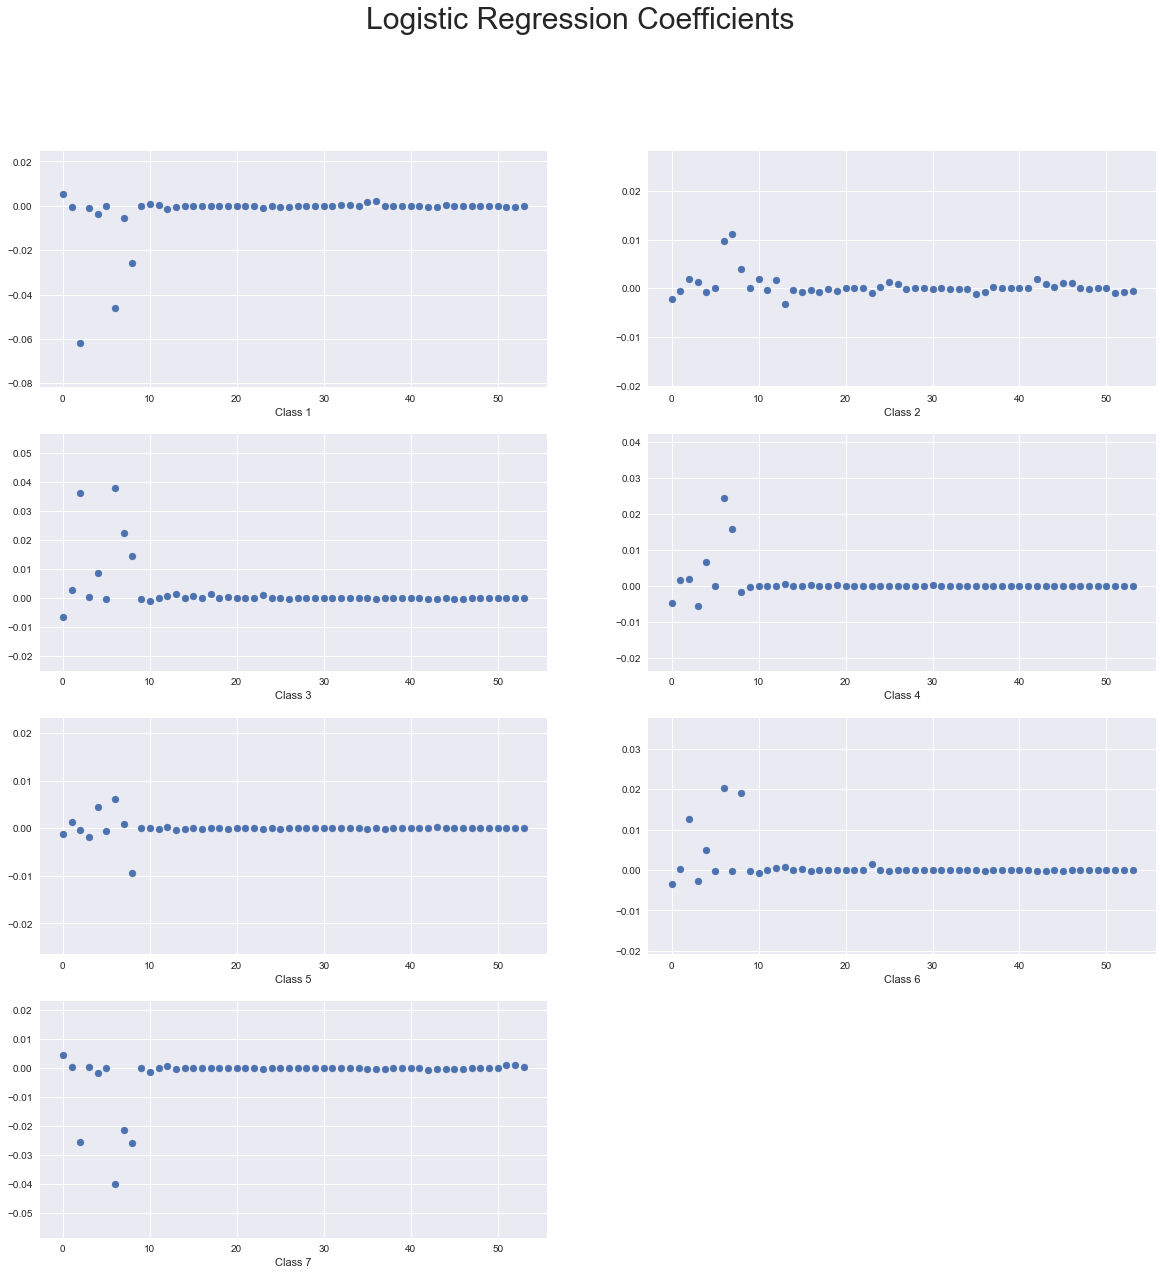

In [130]:
fig, axes = plt.subplots(4,2,figsize=(20,20))
plt.suptitle("Logistic Regression Coefficients", fontsize=30)
k=0
for i in range(4):
    for j in range(2):
        axes[i,j].scatter(np.arange(54),logR_best.coef_[k])
        axes[i,j].set_xlabel("Class "+str(k+1))
        k+=1
        if k == 7:
            break
axes[3][1].remove()

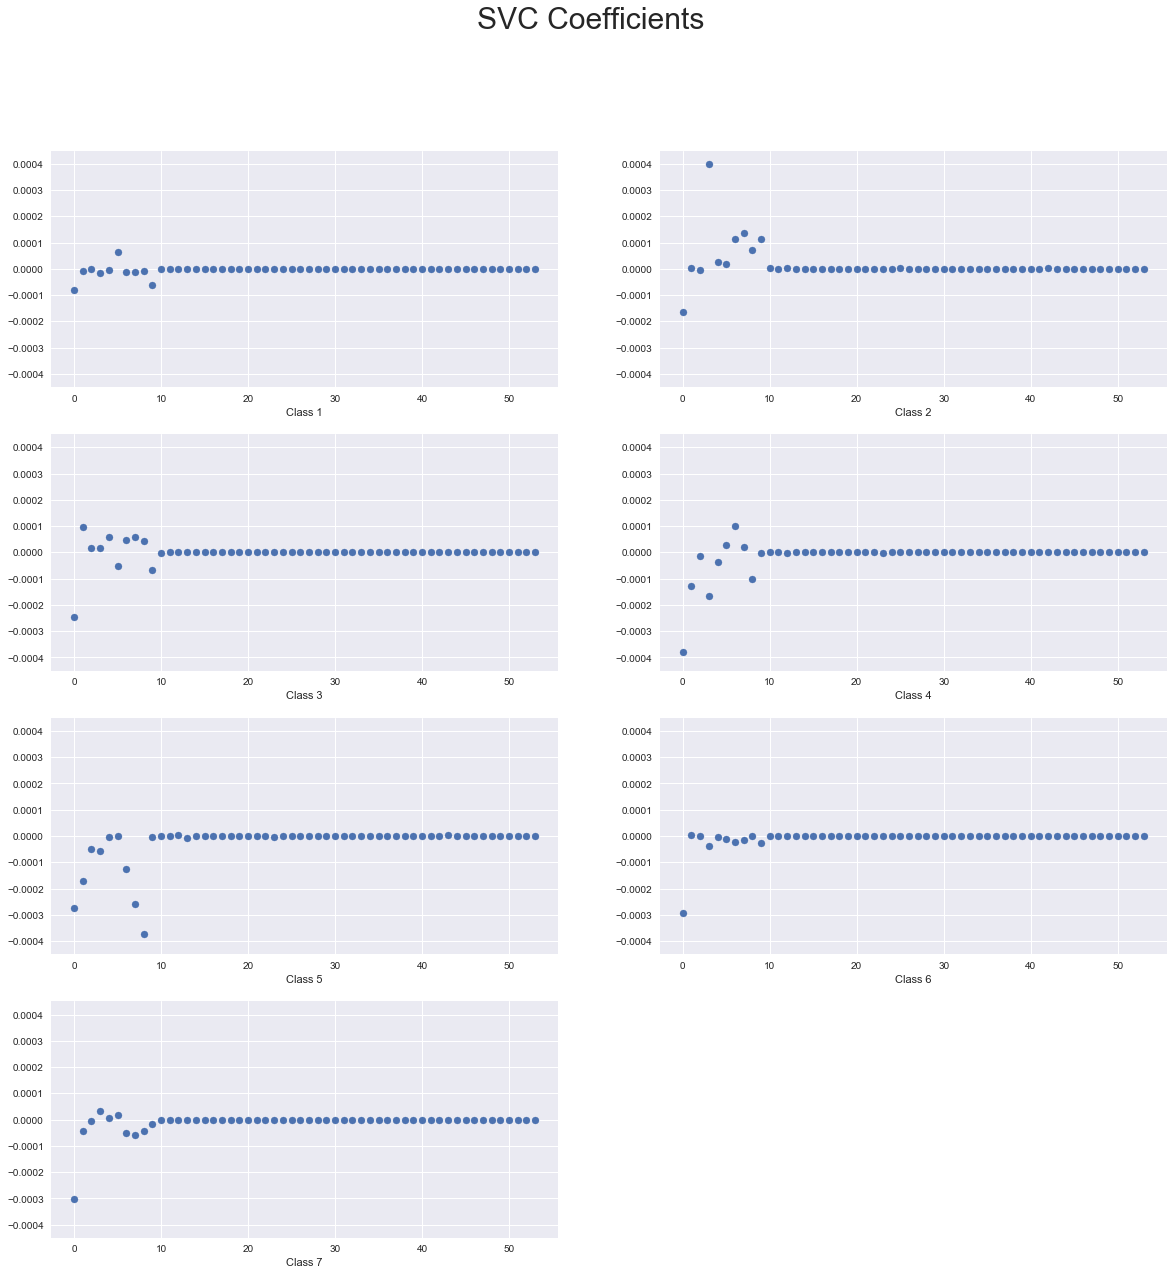

In [138]:
fig, axes = plt.subplots(4,2,figsize=(20,20))
plt.suptitle("SVC Coefficients", fontsize=30)
k=0
for i in range(4):
    for j in range(2):
        axes[i,j].scatter(np.arange(54),svc_best.coef_[k])
        axes[i,j].set_xlabel("Class "+str(k+1))
        axes[i,j].set_ylim(-0.00045,0.00045)
        k+=1
        if k == 7:
            break
axes[3][1].remove()